In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_data=pd.read_csv("USA_cars_datasets.csv")
car_data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
car_data = car_data.drop(columns = ['Unnamed: 0'])

In [4]:
car_data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
#missing data
car_data.isnull().sum().sort_values(ascending=False)

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [24]:
median_price = car_data['price'].median()
car_data['price'] = car_data['price'].astype(int)
car_data['price'].replace(0,median_price ,inplace=True)

In [25]:
brand_of_car = car_data.groupby('brand')['model'].count().reset_index().sort_values('model',ascending = False).head(10)
brand_of_car = brand_of_car.rename(columns = {'model':'count'})
fig = px.bar(brand_of_car, x='brand', y='count', color='count')
fig.show()

#You can reach a lot of information about car brand and their count 

In [8]:
expensive_cars = car_data.sort_values('price',ascending = False).head(2)
fig = px.bar(expensive_cars, x='brand', y='price', color='price')
fig.show()
#We saw which car brand is expensive in this vis.

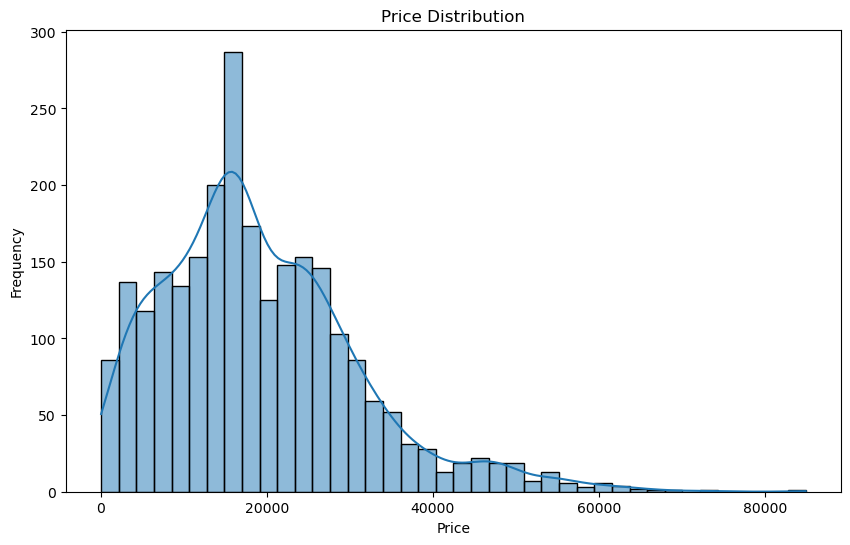

In [16]:
# Price Distribution: Histogram to show the distribution of prices for vehicles in the dataset.
plt.figure(figsize=(10, 6))
sns.histplot(car_data['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

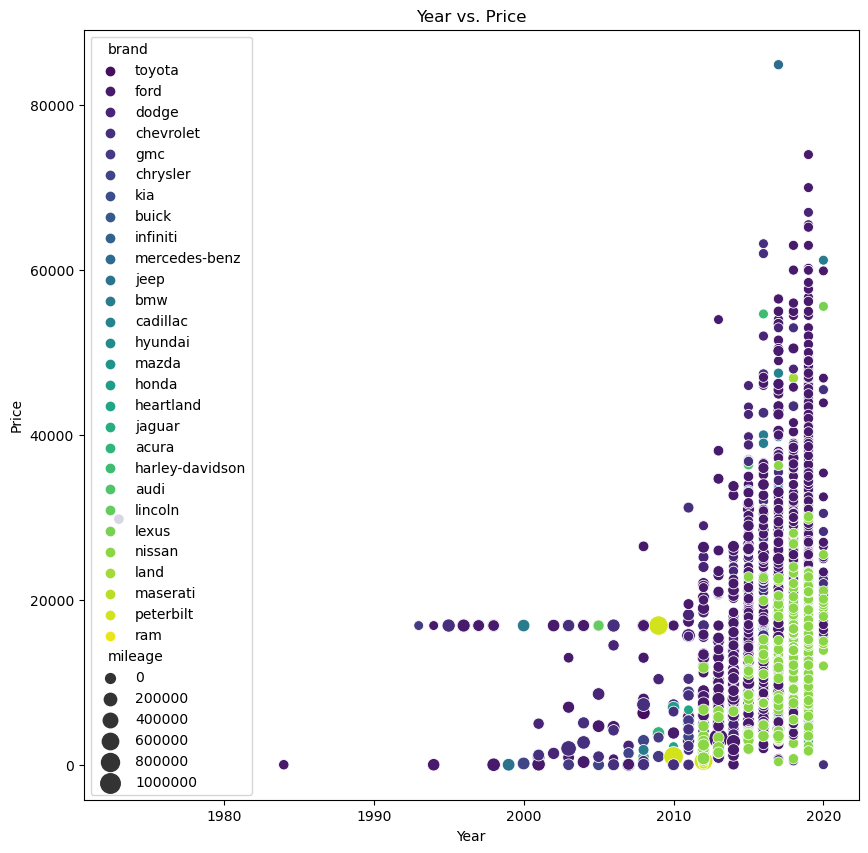

In [18]:
# Year vs. Price
plt.figure(figsize=(10, 10))
sns.scatterplot(data=car_data, x='year', y='price', hue='brand', palette='viridis', size='mileage', sizes=(50, 200))
plt.title('Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

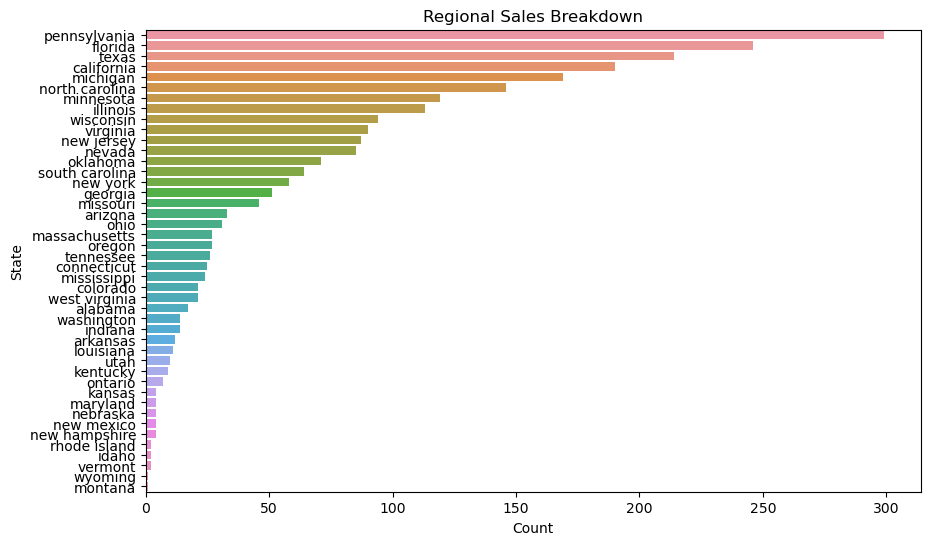

In [21]:
#Regional Sales Breakdown
plt.figure(figsize=(10, 6))
sns.countplot(data=car_data, y='state', order=car_data['state'].value_counts().index)
plt.title('Regional Sales Breakdown')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

In [23]:
# Vehicle Condition vs. Price
fig = px.box(car_data, x='condition', y='price', title='Vehicle Condition vs. Price')
fig.show()